 **BANK LOAN MODELLING**

---
This model is constructed to help identify the potential customers who have a higher probability of purchasing the loan.            
STEP 1:Import the required libraries to construct the model

In [ ]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np   #importing numpy library
import pandas as pd  #importing pandas library
import matplotlib.pyplot as plt  #importing matplotlib library for visualisation
import seaborn as sns
from sklearn.metrics import roc_auc_score

%matplotlib inline

STEP2: Upload the CSV file of the dataset into the Google Collaboratory as given below

In [ ]:
from google.colab import files   
uploadedfiles = files.upload()

Saving Bank_data.csv to Bank_data.csv


Read the uploaded CSV file using pandas 

In [ ]:
df = pd.read_csv('Bank_data.csv')   #Reading the CSV file uploaded


Check if the file is uploaded and display the dataframe

In [ ]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


df.info() command/function is used to display the information about the dataframe as displayed below

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


df.shape displays the shape of the dataframe as(Rows,Columns)

In [ ]:
df.shape


(5000, 14)

df.dtypes displays data types of each column of the dataframe 

In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

df.isnull()checks if there are any "Null Values" in the data frame and returns the boolean value as "False" for no null value and "True" for a null value respectively

In [ ]:
df.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


head() is a method which displays top rows of the data frame.By default it displays 5 rowsfrom the top

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


tail() method displays the last rows of the data frame

In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.tail(-6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
df.isnull().head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False


duplicated() method prints the duplicate values if there are any.
In our data,we dont have any duplicate values which is why an empty dataframe is displayed

In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


describe() method prints the information about statistical measures i.e; count of values for each column,mean of values for each column etc as printed below.

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


We calculate correlation to find how two variables depend on each other.
The value of correlation coefficient lies between -1 and 1.

Here I calculated the correlation coefficient using pearson correlation 






In [ ]:
df.corr(method ='pearson')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


We can see the *"Correlation coefficient"* between Experience and age is 0.99 which is nearer to 1,that means these two respective columns depend upon each other. That is we can find values of one column using another column.
So there is no need of 2 columns in that way so I dropped "Experience" column because usually we can find experience using Age but cant find age using experience.
And ID is a random value generated which is of no need for this model and ZIPCODE is also of no use because its doesnt help us in the prediction of liability of customer to take personal loan. And it also has many unique values which would be diffiult to analyse or transform in the further implementation 

In [ ]:
df = df.drop(['ID','Experience','ZIP Code'],axis=1)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**EXPLORATORY DATA ANALYTICS**

Unique values for respective columns are printed by using the below command

In [ ]:
print("Unique values for respective columns are given below")
df.apply(pd.Series.nunique)

Unique values for respective columns are given below


Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

This command prints the no.of Zero values of mortgage column i.e., count of zeros

In [ ]:
df['Mortgage'].isin([0]).sum()

3462

This command prints the no.of Zero values of CCAvg column i.e., count of zeros

In [ ]:
df['CCAvg'].isin([0]).sum()

106

we have printed the count of values of categorical variables as given below

In [ ]:
df['Family'].value_counts(ascending=True) #count of values of "Family" column

3    1010
4    1222
2    1296
1    1472
Name: Family, dtype: int64

In [ ]:
df['Education'].value_counts(ascending=False) #count of values of "Education" column

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['CD Account'].value_counts()  #count of values of "CD Account" column

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['Securities Account'].value_counts() #count of values of "Securities Account" column

0    4478
1     522
Name: Securities Account, dtype: int64

**UNIVARIATE ANALYSIS AND BIVARIATE ANALYSIS**


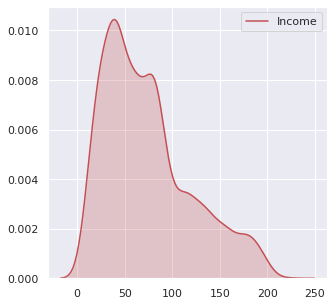

In [ ]:
#UNIVARIATE ANALYSIS
#Analysis of one variable
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Income'],shade=True,color="r") #plotting of density plot of "Income" Variable using seaborn and we can see it is righ skewed

We have plotted density plot of Income,mortgage. 

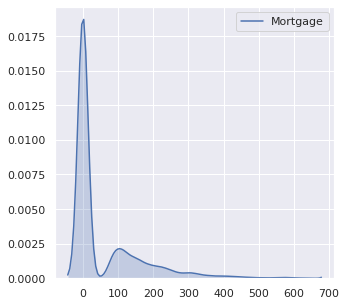

In [ ]:
#The graph plotted for mortgage is right skewed
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Mortgage'],shade=True)

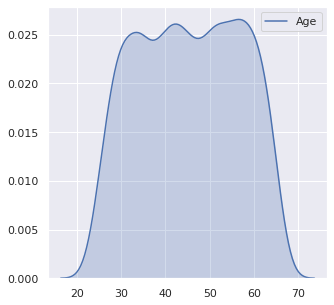

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Age'],shade=True)     #density plot of "Age" Column

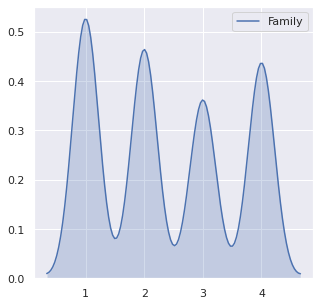

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Family'],shade=True)

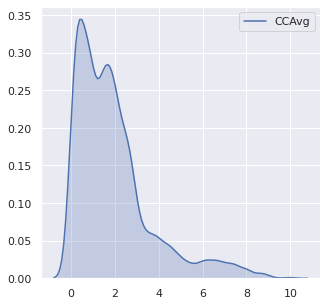

In [ ]:
#We can see that the graph is not normally distributed,it is right skewed.
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['CCAvg'],shade=True)      #density plot of "CCAvg" column

This is a count plot plotted for "Family" column in the process of univariate analysis

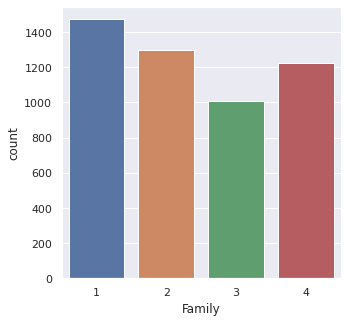

In [ ]:
#According to the plot we can say that family size "1" are in high count
sns.countplot(df['Family'])

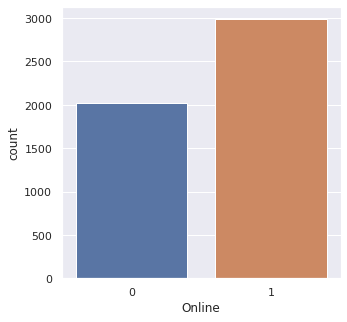

In [ ]:
#we can say from the plot that most people use internet banking facility
sns.countplot(df['Online']) #countplot of Online column

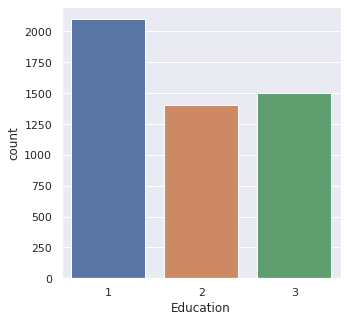

In [ ]:
#Most people fall under the level 1 of education i.e.,undergraduation
sns.countplot(df['Education'])

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

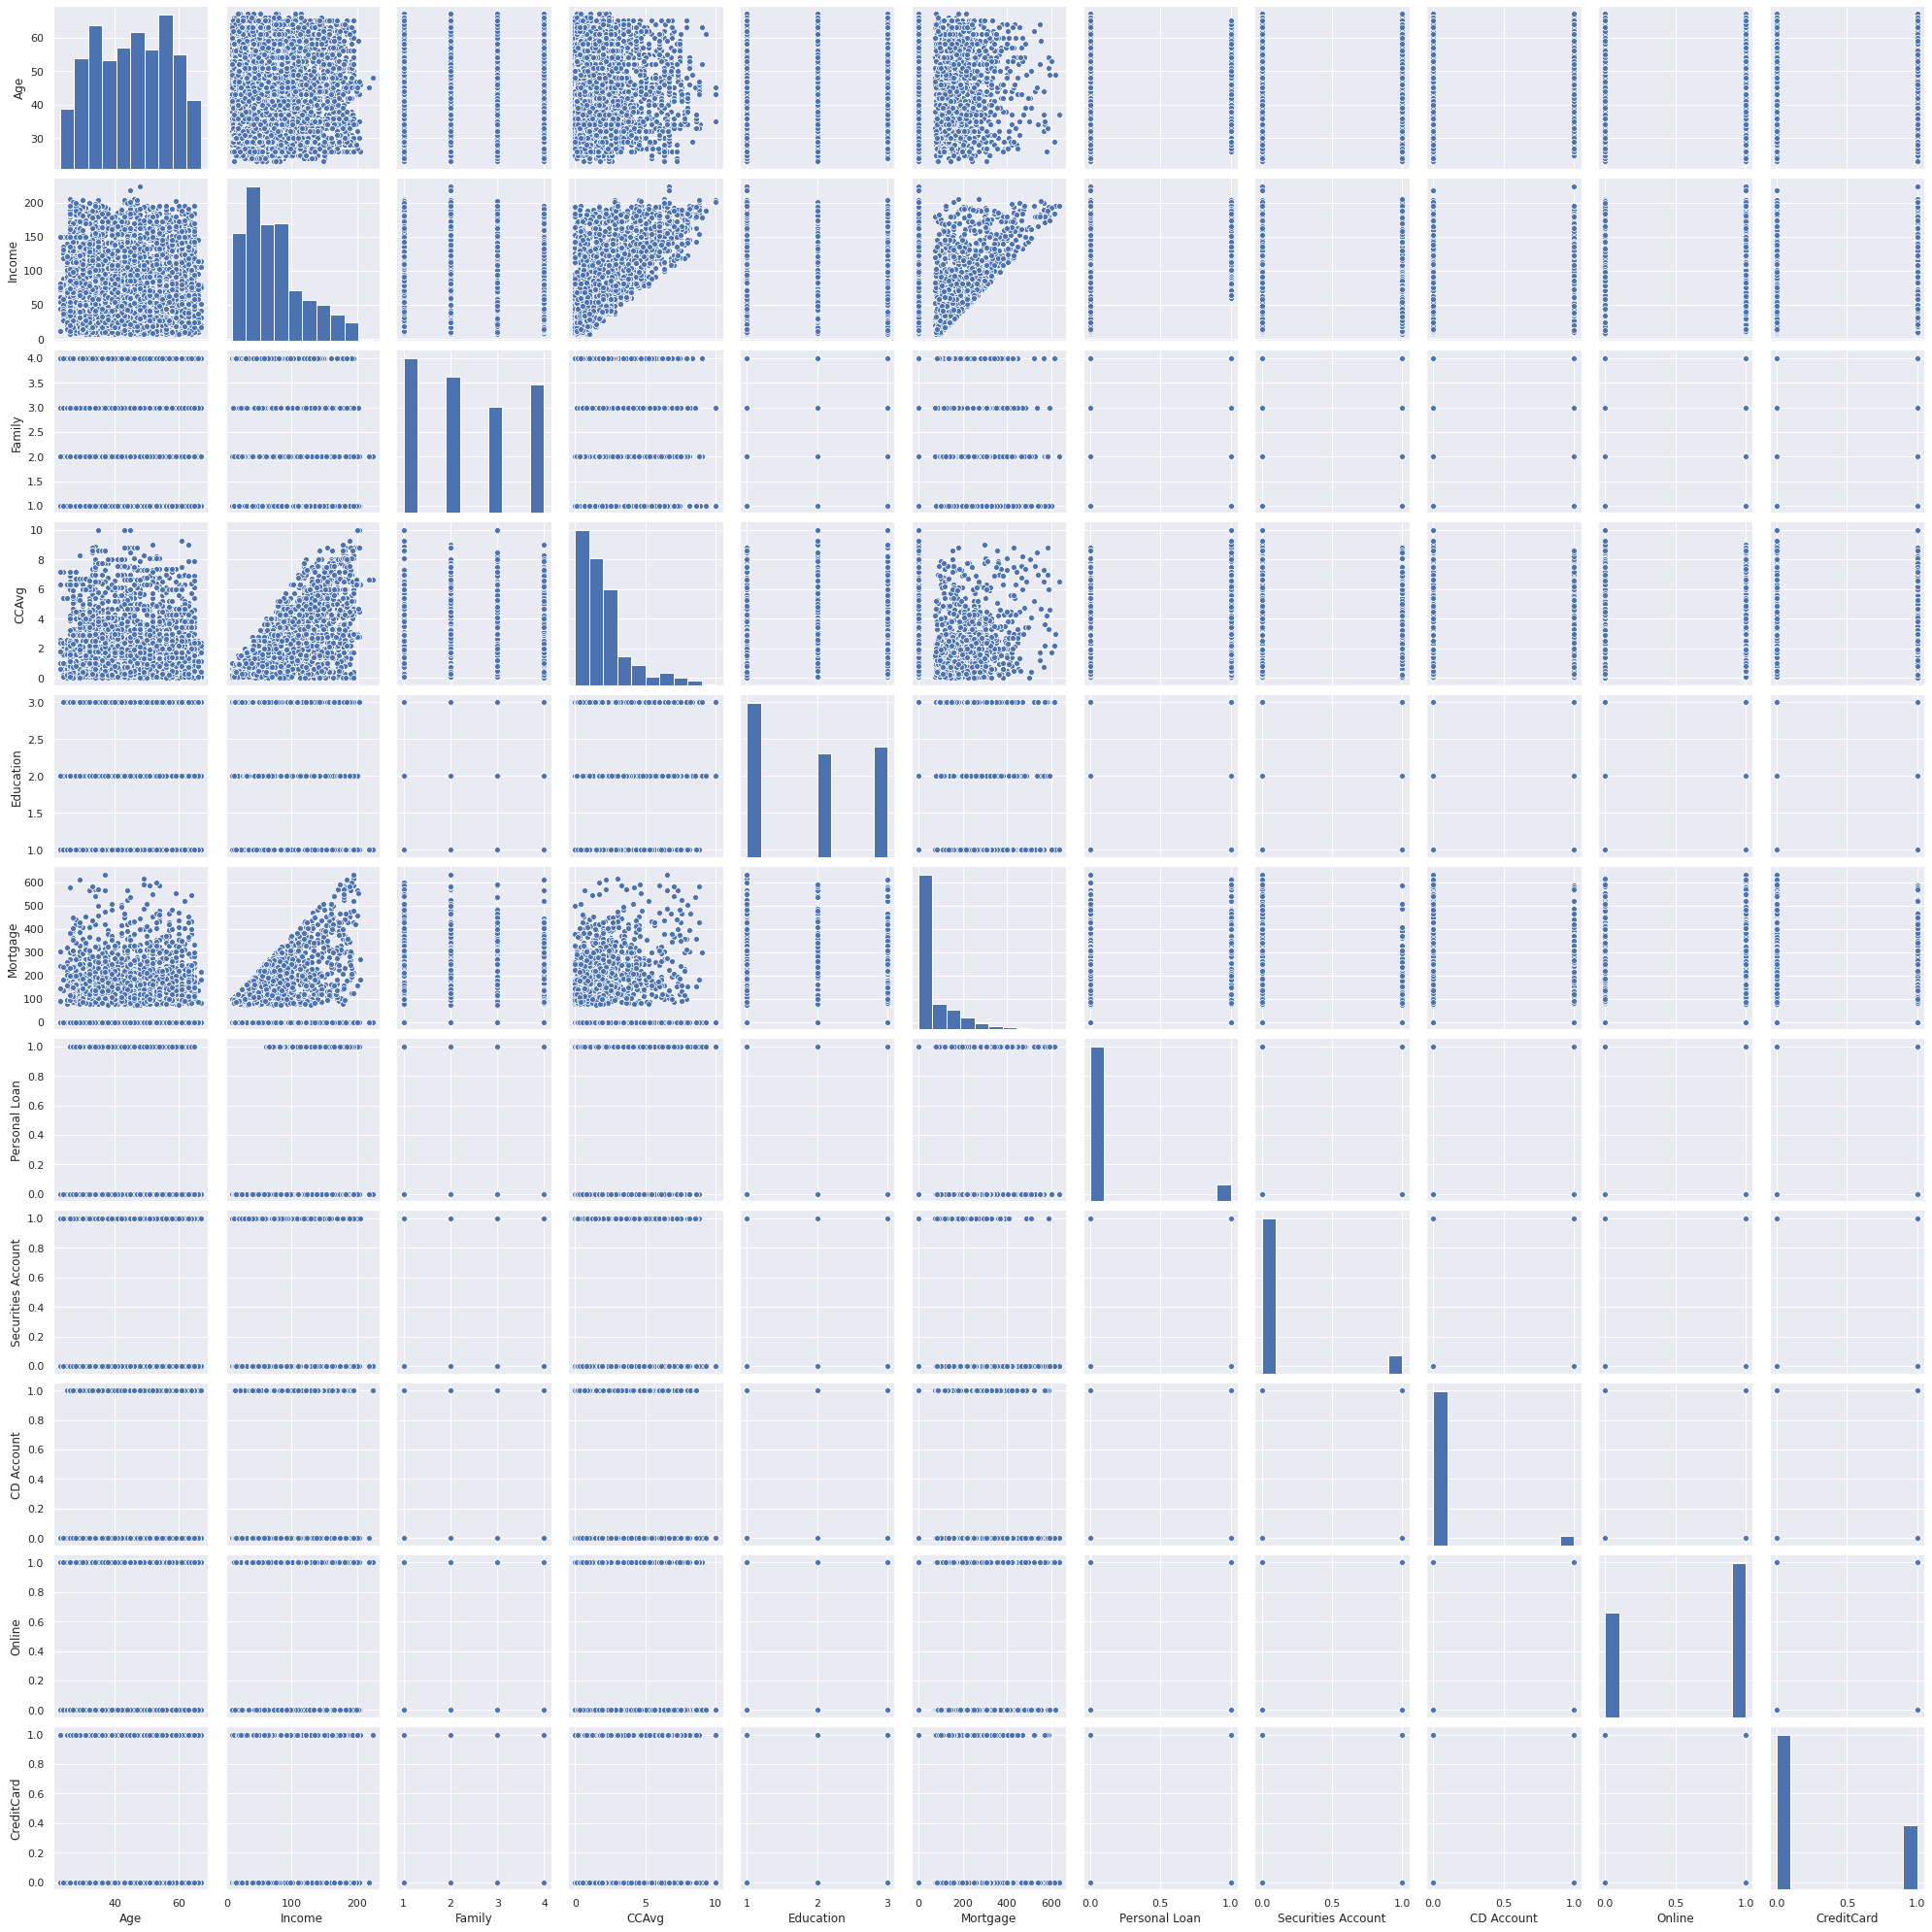

In [ ]:
#BIVARIATE ANALYSIS
sns.pairplot(df)

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.
This is a heat map showing correlations between variables

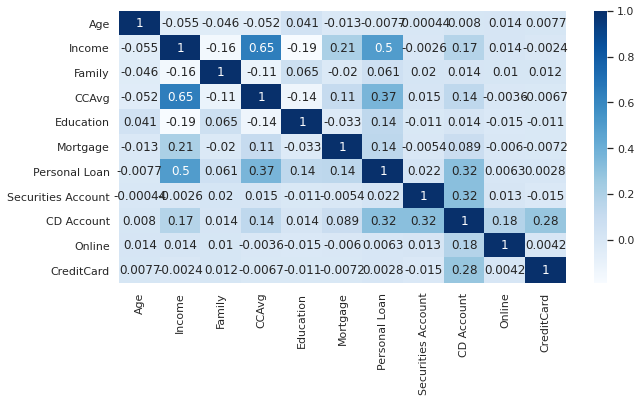

In [ ]:
plt.figure(figsize=(10,5))
c0rrelation = df.corr()
sns.heatmap(c0rrelation,cmap = "Blues",annot = True)

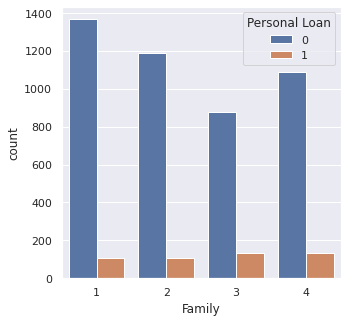

In [ ]:
# Most people donot take the personal loan across every level of family size
sns.countplot(x="Family",data=df,hue="Personal Loan");

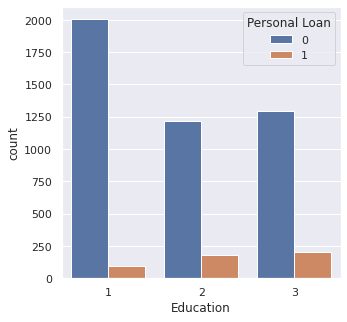

In [ ]:
#In the people taking loan people belonging to level 3 of education are the most comparitively and we can see most people across each level of education donot have personal loan
sns.countplot(x="Education",data=df,hue="Personal Loan");

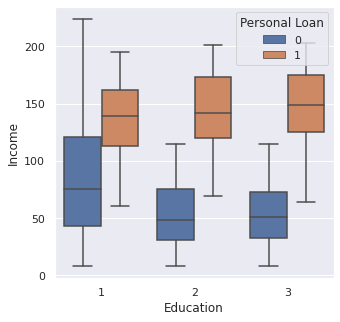

In [ ]:
#In each education level the people who has more income have been granted personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

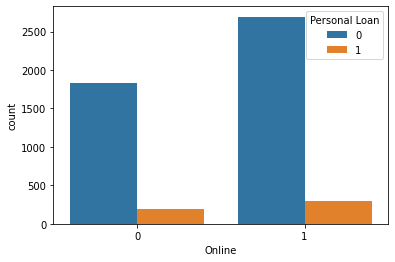

In [ ]:

sns.countplot(x="Online",data=df,hue="Personal Loan");

TRANSFORMATIONS    
Since the columns Mortgage,Income,CCAvg are skewed we apply power transformations to bring them to normal distribution.
I tried to use box cox transformation for three variables but box cox does not accept negative values
So,I went for the better option i.e., Yeo johnson transformation

Lambda value used for Transformation: 0.2766790567755529


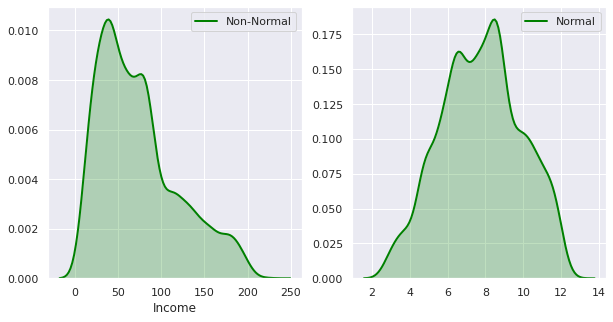

In [ ]:
#Boxcox transformation for Income column

from scipy import stats 
  


  
# transform training data & save lambda value 
fitted_data, fitted_lambda = stats.boxcox(df['Income']) 
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(df['Income'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 
plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

Yeo johnson transformer for Income and CCAvg column respectively

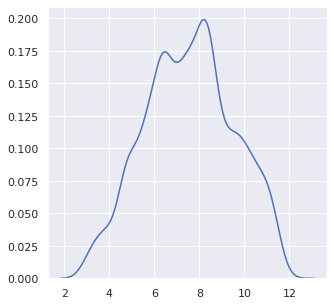

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["Income"].values.reshape(-1,1))
plot=pt.transform(df["Income"].values.reshape(-1,1))
sns.distplot(plot,hist=False)
#we can see the plot is now normally distributed

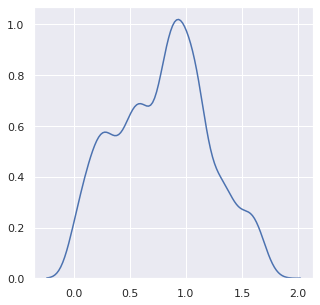

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(df["CCAvg"].values.reshape(-1,1))
plot=pt.transform(df["CCAvg"].values.reshape(-1,1))
sns.distplot(plot,hist=False)
#we can see the plot is now normally distributed

In [ ]:
#we performed binning for the mortgage to transform the values to fall into the respective labels which can give better result in the model
df["Mbin"] = pd.cut(df["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels = [1,2,3,4,5,6,7],include_lowest=True)
df.drop("Mortgage",axis=1,inplace=True)

In [ ]:
df["Mbin"].head()

0    1
1    1
2    1
3    1
4    1
Name: Mbin, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

Normalisation and Logistic regression for the prediction 

In [ ]:
attributes=['Age','Income','CCAvg','Education']

In [ ]:
x=df[attributes]

In [ ]:
y=df['Personal Loan']

In [ ]:
from sklearn.model_selection import train_test_split
#we splitted the dataset into train and test set in the ratio of 70:30 respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#we used standard scalar for better results
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [ ]:
#apply logistic regression for the prediction of the likelihood of a customer buying personal loans. 
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#The train accuracy
model.score(x_train, y_train)

0.9394285714285714

In [ ]:
#The test accuracy
model.score(x_test, y_test)

0.936

In [ ]:
#The confusion matrix for the model

confusion_matrix(y_test, y_pred)

array([[1337,   14],
       [  82,   67]])

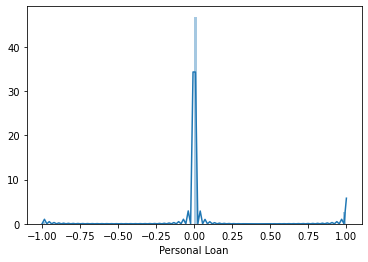

In [ ]:
sns.distplot((y_test - y_pred),bins = 100)

Accuracy: 0.9686666666666667
F1 score: 0.8185328185328186
Recall: 0.7114093959731543
Precision: 0.9636363636363636

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.96      0.71      0.82       149

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500


 confussion matrix:
 [[1347    4]
 [  43  106]]
logistic regression F1 score: 0.82
roc: 0.8542243130865033


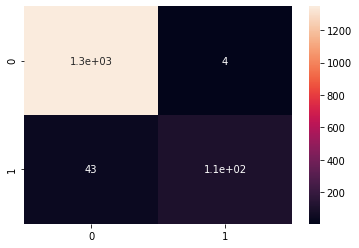

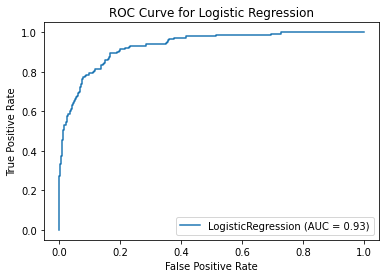

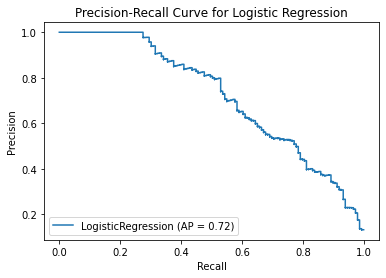

In [ ]:
#FOR LOGISTIC REGRESSION


from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,plot_roc_curve,plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('F1 score:', f1_score(y_test, y_pred))
print ('Recall:', recall_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
cf=confusion_matrix(y_test, y_pred)
print ('\n confussion matrix:\n',cf)
sns.heatmap(cf, annot=True)
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(model, x_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')
score = f1_score(y_pred, y_test)

# print
print ("logistic regression F1 score: {:.2f}".format(score))
roc=roc_auc_score(y_test,y_pred)
print("roc:",roc)


KN NEIGHBOUR CLASSIFICATION

Confusion Matrix:
[[1347    4]
 [  43  106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.96      0.71      0.82       149

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500

Accuracytest: 0.9686666666666667
Accuracytrain: 0.9705714285714285
KN Neighbour classification F1 score: 0.82
roc: 0.8542243130865033


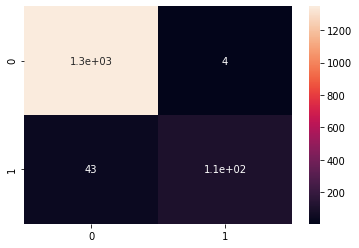

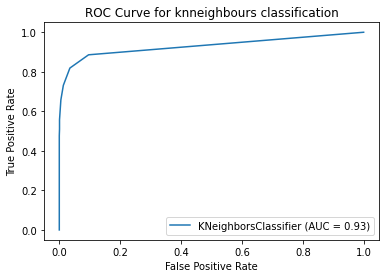

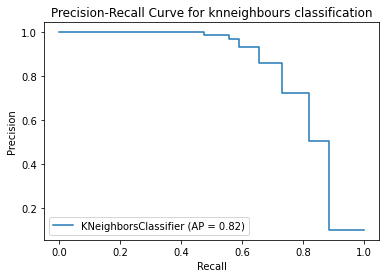

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 8)
knnclassifier.fit(x_train, y_train)
#At last we need to make prediction. It can be done with the help of following 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracytest:",result2)
result3 = knnclassifier.score(x_train, y_train)
print("Accuracytrain:",result3)

sns.heatmap(result, annot=True)
plot_roc_curve(knnclassifier, x_test, y_test)
plt.title('ROC Curve for knneighbours classification')

plot_precision_recall_curve(knnclassifier, x_test, y_test)
plt.title('Precision-Recall Curve for knneighbours classification')
score1 = f1_score(y_pred, y_test)

# print
print ("KN Neighbour classification F1 score: {:.2f}".format(score1))
roc=roc_auc_score(y_test,y_pred)
print("roc:",roc)



DECISION TREE CLASSIFICATION

In [ ]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  

  
# Function to split the dataset 
def splitdataset(df): 
  attributes=['Age','Income','CCAvg','Education']
  X=df[attributes]
  Y=df['Personal Loan']
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
  return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
    score3 = f1_score(y_pred, y_test)
    print ("decision trees classification F1 score: {:.2f}".format(score3))
    roc=roc_auc_score(y_test,y_pred)
    print("roc:",roc)  

  
# Driver code 
def main(): 
      
    # Building Phase 
    
    X, Y, X_train, X_test, y_train, y_test = splitdataset(df) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 


Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1351    0]
 [  57   92]]
Accuracy :  96.2
Report :                precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       1.00      0.62      0.76       149

    accuracy                           0.96      1500
   macro avg       0.98      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500

decision trees classification F1 score: 0.76
roc: 0.8087248322147651
Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1351    0]
 [  57   92]]
Accuracy :  96.2
Report :                precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       1.00      0.62      0.76       149

    accuracy                           0.96      1500
   macro avg       0.98      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500

decision t

RANDOM FORST CLASSIFICATION

In [ ]:

attributes=['Age','Income','CCAvg','Education']
x=df[attributes]
y=df['Personal Loan']
  
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(  
x, y, test_size = 0.3, random_state = 1) 
      
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 50)
classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier1.predict(X_test)

Confusion Matrix:
[[1347    4]
 [  43  106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       0.96      0.71      0.82       149

    accuracy                           0.97      1500
   macro avg       0.97      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500

Accuracy: 0.9686666666666667
Accuracytrain : 0.9997142857142857
random forest F1 score: 0.82
roc: 0.8542243130865033


Text(0.5, 1.0, 'Precision-Recall Curve for random forest classification')

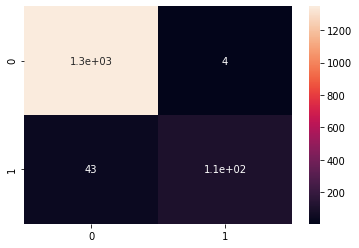

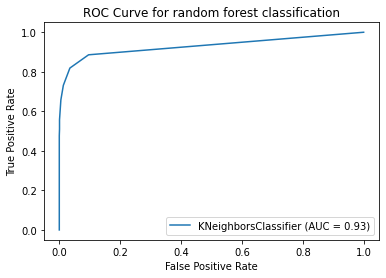

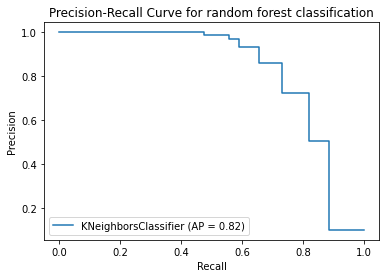

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,plot_roc_curve,plot_precision_recall_curve

result0 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
result3 = classifier1.score(X_train,y_train)
print("Accuracytrain :",result3)
score4 = f1_score(y_pred, y_test)

# print
print ("random forest F1 score: {:.2f}".format(score4))
roc=roc_auc_score(y_test,y_pred)
print("roc:",roc)

sns.heatmap(result0, annot=True)
plot_roc_curve(knnclassifier, x_test, y_test)
plt.title('ROC Curve for random forest classification')

plot_precision_recall_curve(knnclassifier, x_test, y_test)
plt.title('Precision-Recall Curve for random forest classification')


**BUSINESS UNDERSTANDING OF MODEL**             
The model has to be correctly constructed for the better results fo the prediction values.
for that we have imported required libraries and started our code for the model.
we have imported the dataset and read with the help of pandas and checked the datatype,statistical summary,shape,null values etc.
We calculated correlation coefficient and dropped the columns which are dependent on each other with high correlation coefficient.And we also dropped unwanted columns for better perfomance of the model.
we have performed univariate and bivariate analysis and understood variables.
We have identified the skewness in 3 columns and removed the skewness using power transformations and brought them to normal distribution which helps the model and normlised the data and splitted the data into train set and test set in 70:30 ratio.
We applied the logistic regression and noted all the respective metrics to evaluate the model
we got an accuracy of 93.6% for test and 93.9% for train
and we have also performed other classification algorithms KNNeighbours classification,Decision trees classification,Random forest classification.
According to test accuracy Random forest classification performed well and comparing the F1 scores of each classification model random forest,logistic regression,KNN classification,and random forest has score of 0.82 when taken accuracy,F1 score,roc score under consideration and comparing 
Random forest classification model performed well than the Logistic regression in this model with above  noted observations










Done by Panuganti Jasmithasai